# Analysis of Video Game Sales
## By: Xuan Zheng
## Student Number: 100789833

# 1. Introduction

In 2021, the worldwide video game market revenue will reach $198.6 billion. Game players are also well known to the business and the public as a vast and potential consumer group. What kinds of games are more popular with gamers? What factors affect game sales? I sometimes ponder these questions while playing as a video gamer and maybe even a future gaming industry practitioner. Based on curiosity about the answers to these questions, I found this dataset at kaggle.com, which was generated by scraping from vgchartz.com. This dataset contains essential information on over 16,500 video games released from 1980 to 2016 (and includes some pre-sale games), such as release platform, release year, game type, and publisher, and where these games are located in North America, Europe, Japan, etc. Regional and global sales.

Interestingly, the top five games in this dataset are all released by Nintendo, despite different platforms, release times, and game types. Does this mean that publishers are one of the critical factors affecting game sales? Or is Nintendo particularly popular with gamers as a game publisher? If you want to know the answers to these questions. The project will build on this dataset to explore gamer preferences and factors affecting game sales.

# 2. Analysis

## 2-1. Importing data into Python

In [322]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('https://raw.githubusercontent.com/Xuan0629/CSCI_2000_ASSI_1/main/vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## 2-2. Data Overview

### 2-2-1. This step is for taking a quick look at the top 10 rows of the dataset to check the data type of every column and identify the categorical attributes

In [278]:
df.head(n=10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


### 2-2-2. This step briefly describes the data: a number of rows, attribute types and number of non-null values

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## 2-3. Cleaning Data

### 2-3-1. The following two steps are for data cleaning. The specific is to find the data with NaN in the categorical attributes in which the non-null count is less than the RangeIndex

In [280]:
df[df.loc[:,'Year'].isna()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [281]:
df[df.loc[:,'Publisher'].isna()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42


### 2-3-2. This step is to delete every data with NaN.

In [282]:
df=df.dropna(axis=0)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### 2-3-3. This step is to ensure every data with NaN was already deleted.

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


## 2-4. Exploratory analysis

### 2-4-1. Overview of variable categories

#### 2-4-1-1. This step is to find how many categories there are in the "Platform" series and what they are

In [284]:
df['Platform'].value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

#### 2-4-1-2. This step is to find how many categories there are in the "Year" series and what they are

In [285]:
df['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
2006.0    1008
2005.0     936
2002.0     829
2003.0     775
2004.0     744
2012.0     655
2015.0     614
2014.0     580
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     342
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

#### 2-4-1-3. This step is to find how many categories there are in the "Genre" series and what they are

In [286]:
df['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

#### 2-4-1-4. This step is to find how many categories there are in the "Publisher" series and what they are

In [287]:
df['Publisher'].value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: Publisher, Length: 576, dtype: int64

### 2-4-2. Analysis of the "Platform" series

#### 2-4-2-1. This step uses a bar chart to more intuitively display the platform and the number of games released on the platform

<AxesSubplot:xlabel='count', ylabel='Platform'>

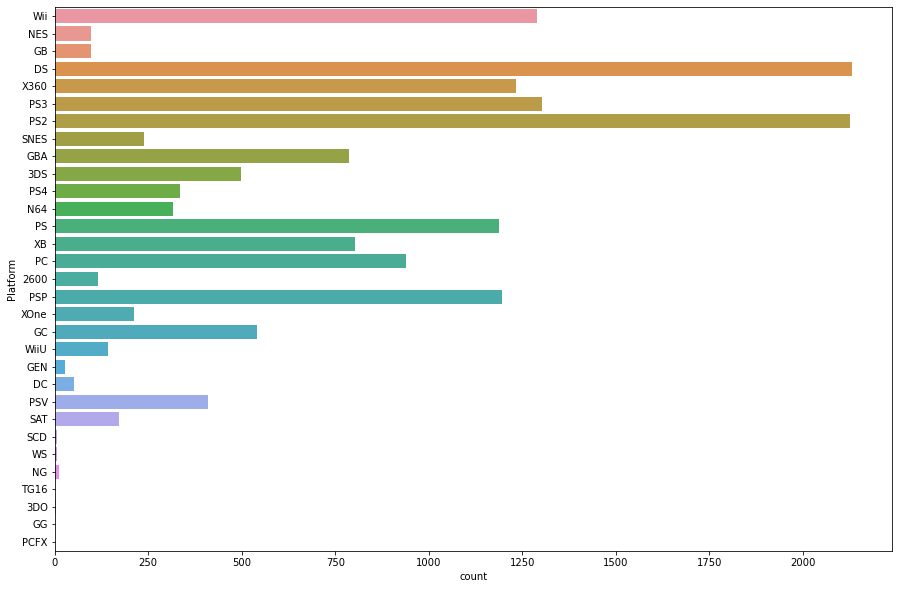

In [288]:
plt.figure(figsize=(15,10))
sns.countplot(y='Platform',data=df)

#### 2-4-2-2. This step is used to obtain a description of the data for analysis

In [289]:
grouped_Platform=df["Global_Sales"].groupby(df["Platform"])
d_Platform=grouped_Platform.describe()
d_Platform

,count,mean,std,min,25%,50%,75%,max
Platform,,,,,,,,
2600,116.0,0.746293,0.955571,0.07,0.3050,0.475,0.7800,7.81
3DO,3.0,0.033333,0.023094,0.02,0.0200,0.020,0.0400,0.06
3DS,499.0,0.493527,1.403221,0.01,0.0500,0.130,0.3500,14.35
DC,52.0,0.307115,0.469912,0.02,0.0775,0.135,0.2975,2.42
DS,2131.0,0.384284,1.444833,0.01,0.0500,0.110,0.2800,30.01
GB,97.0,2.622887,5.390733,0.06,0.3000,1.180,2.1800,31.37
GBA,786.0,0.388830,0.912071,0.01,0.0600,0.160,0.3900,15.85
GC,542.0,0.363727,0.693107,0.01,0.0700,0.150,0.3700,7.07
GEN,27.0,1.050370,1.492217,0.03,0.0700,0.150,1.7100,6.03


#### 2-4-2-3. This step does the necessary cleaning for data containing NaN

In [290]:
d_Platform=d_Platform.dropna(axis=0)
d_Platform.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 2600 to XOne
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   29 non-null     float64
 1   mean    29 non-null     float64
 2   std     29 non-null     float64
 3   min     29 non-null     float64
 4   25%     29 non-null     float64
 5   50%     29 non-null     float64
 6   75%     29 non-null     float64
 7   max     29 non-null     float64
dtypes: float64(8)
memory usage: 2.0+ KB


#### 2-4-2-4. This step sorts the table obtained in the previous in descending order of mean value

In [291]:
d_Platform.sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
Platform,,,,,,,,
GB,97.0,2.622887,5.390733,0.06,0.3000,1.180,2.1800,31.37
NES,98.0,2.561939,5.108195,0.06,1.0000,1.375,2.2225,40.24
GEN,27.0,1.050370,1.492217,0.03,0.0700,0.150,1.7100,6.03
SNES,239.0,0.837029,1.869059,0.01,0.1350,0.320,0.7050,20.61
PS4,336.0,0.827679,1.618966,0.01,0.0600,0.220,0.8200,14.24
X360,1234.0,0.785737,1.635856,0.01,0.1100,0.290,0.7800,21.82
2600,116.0,0.746293,0.955571,0.07,0.3050,0.475,0.7800,7.81
PS3,1304.0,0.728029,1.424341,0.01,0.1100,0.290,0.7900,21.40
Wii,1290.0,0.705279,3.177537,0.01,0.0900,0.200,0.4900,82.74


#### 2-4-2-5. This step is used to get the correlation of "count" with other items of data

In [292]:
corr_matrix_Platform = d_Platform.corr()
corr_matrix_Platform['count']

count    1.000000
mean    -0.115859
std      0.040912
min     -0.466501
25%     -0.201826
50%     -0.168164
75%     -0.151039
max      0.436775
Name: count, dtype: float64

#### 2-4-2-6. This step shows the correlation between "count" and "mean" graphically

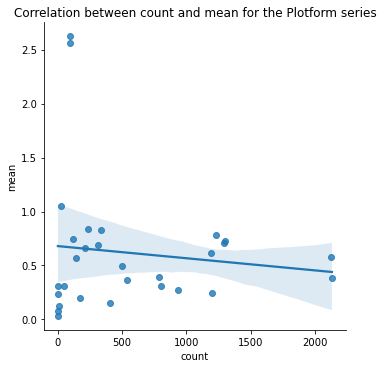

In [293]:
sns.lmplot(x='count', y='mean', data=d_Platform).set(title="Correlation between count and mean for the Plotform series")

This shows that game sales have a very weak negative correlation with the number of games owned by the game distribution platform.

#### 2-4-2-7. This step draws a scatter plot based on the "Platform" and "'Global_Sales" series in the primary dataset

<AxesSubplot:xlabel='Platform', ylabel='Global_Sales'>

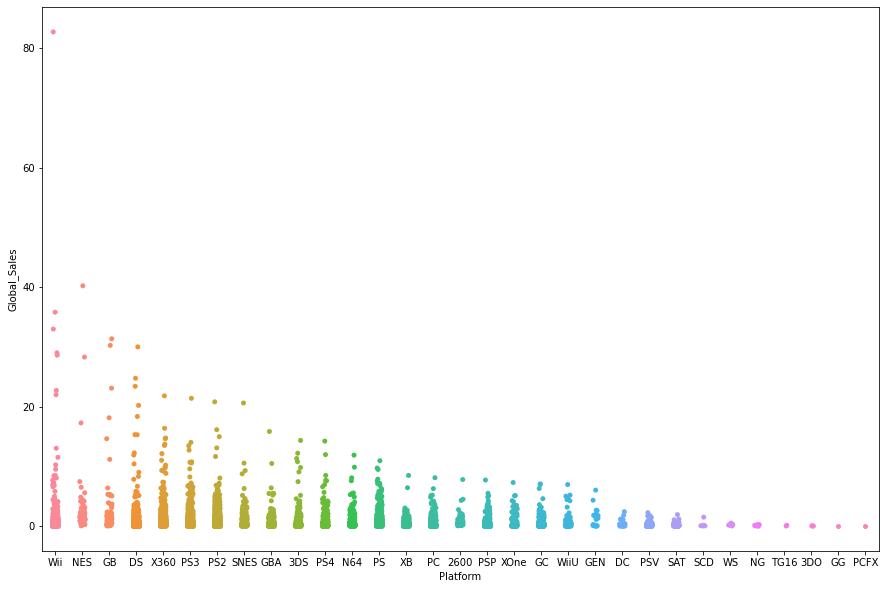

In [294]:
plt.figure(figsize=(15,10))
sns.stripplot(x=df['Platform'],y=df['Global_Sales'],data=df,jitter=True)

This step verifies the conclusion obtained in the previous step. Not all platforms with better sales performance are platforms with many released games.

### 2-4-3. Analysis of the "Year" series

#### 2-4-3-1. This step uses a bar graph to more intuitively display the year and the number of games released that year

<AxesSubplot:xlabel='count', ylabel='Year'>

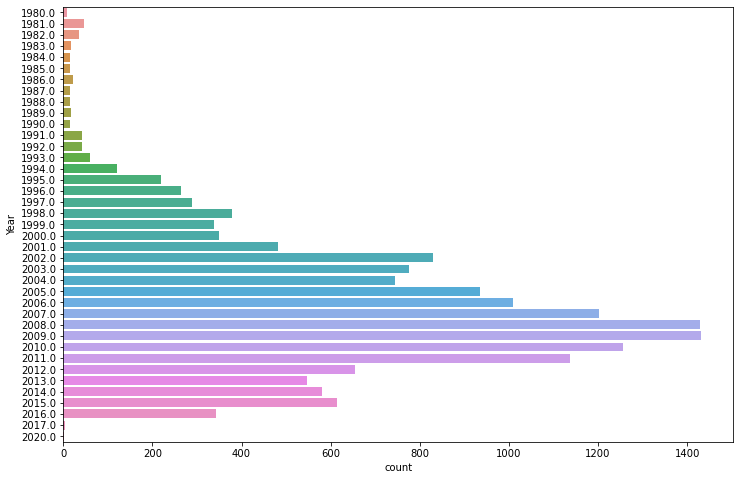

In [295]:
plt.figure(figsize=(12,8))
sns.countplot(y='Year',data=df)

That analysis of the annual game releases number maybe shows that the video game market continues to develop and gradually form a stable market.

#### 2-4-3-2. This step is used to obtain a description of the data for analysis

In [296]:
grouped_Year=df["Global_Sales"].groupby(df["Year"])
d_Year=grouped_Year.describe()
d_Year

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1980.0,9.0,1.264444,1.383312,0.24,0.3400,0.770,1.1500,4.31
1981.0,46.0,0.777609,0.781827,0.13,0.3150,0.465,0.9600,4.50
1982.0,36.0,0.801667,1.257779,0.14,0.3350,0.540,0.7725,7.81
1983.0,17.0,0.987647,0.838947,0.17,0.4000,0.770,1.1300,3.20
1984.0,14.0,3.597143,7.200839,0.27,1.1300,1.485,2.0900,28.31
1985.0,14.0,3.852857,10.510655,0.02,0.4650,1.015,1.4550,40.24
1986.0,21.0,1.765238,1.330570,0.29,1.1400,1.360,2.2000,6.51
1987.0,16.0,1.358750,1.222892,0.07,0.4650,0.885,2.2125,4.38
1988.0,15.0,3.148000,4.413943,0.03,0.9700,1.510,3.1450,17.28


#### 2-4-3-3. This step does the necessary cleaning for data containing NaN

In [297]:
d_Year=d_Year.dropna(axis=0)
d_Year.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 38 entries, 1980.0 to 2017.0
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   38 non-null     float64
 1   mean    38 non-null     float64
 2   std     38 non-null     float64
 3   min     38 non-null     float64
 4   25%     38 non-null     float64
 5   50%     38 non-null     float64
 6   75%     38 non-null     float64
 7   max     38 non-null     float64
dtypes: float64(8)
memory usage: 2.7 KB


#### 2-4-3-4. This step sorts the table obtained in the previous step in descending order of mean value

In [298]:
d_Year.sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1989.0,17.0,4.320588,7.895218,0.06,1.1000,1.610,2.1200,30.26
1985.0,14.0,3.852857,10.510655,0.02,0.4650,1.015,1.4550,40.24
1984.0,14.0,3.597143,7.200839,0.27,1.1300,1.485,2.0900,28.31
1988.0,15.0,3.148000,4.413943,0.03,0.9700,1.510,3.1450,17.28
1990.0,16.0,3.086875,4.825224,0.30,1.1650,1.520,2.9175,20.61
1992.0,43.0,1.771163,2.469986,0.01,0.1600,0.780,2.3200,11.18
1986.0,21.0,1.765238,1.330570,0.29,1.1400,1.360,2.2000,6.51
1987.0,16.0,1.358750,1.222892,0.07,0.4650,0.885,2.2125,4.38
1980.0,9.0,1.264444,1.383312,0.24,0.3400,0.770,1.1500,4.31


#### 2-4-3-5. This step is used to get the correlation of "count" with other items of data

In [299]:
corr_matrix_Year = d_Year.corr()
corr_matrix_Year['count']

count    1.000000
mean    -0.486140
std     -0.280410
min     -0.467790
25%     -0.523642
50%     -0.583262
75%     -0.564273
max      0.436074
Name: count, dtype: float64

#### 2-4-3-6. This step shows the correlation between "count" and "mean" graphically

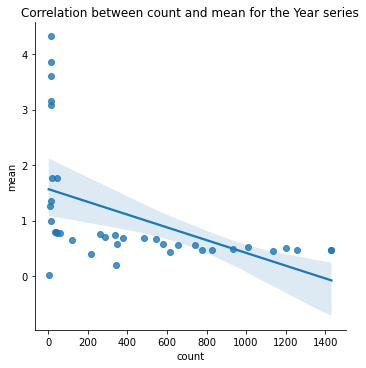

In [300]:
sns.lmplot(x='count', y='mean', data=d_Year).set(title="Correlation between count and mean for the Year series")

This shows a moderate negative correlation between game sales and the total number of games released in the game release year.

#### 2-4-3-7. This step draws a scatter plot based on the "Year" and "'Global_Sales" series in the primary dataset

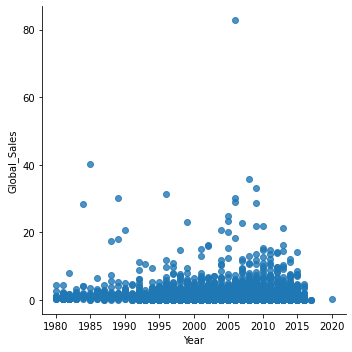

In [301]:
sns.lmplot(x='Year',y='Global_Sales',fit_reg=False,data=df)

This shows that most games don't sell more than 20 million copies and that only a handful can sell well each year.

### 2-4-4. Analysis of the "Genre" series

#### 2-4-4-1. This step uses a bar graph to more intuitively display the type of game and the number of games belonging to that type

<AxesSubplot:xlabel='count', ylabel='Genre'>

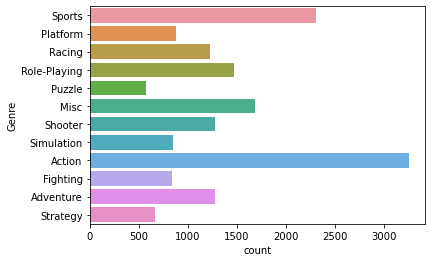

In [302]:
sns.countplot(y='Genre',data=df)

#### 2-4-4-2. This step is used to obtain a description of the data for analysis

In [303]:
grouped_Genre=df["Global_Sales"].groupby(df["Genre"])
d_Genre=grouped_Genre.describe()
d_Genre

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,3251.0,0.529942,1.165238,0.01,0.07,0.190,0.500,21.40
Adventure,1274.0,0.184137,0.510902,0.01,0.02,0.060,0.160,11.18
Fighting,836.0,0.531160,0.957915,0.01,0.08,0.210,0.550,13.04
Misc,1686.0,0.468488,1.332150,0.01,0.06,0.160,0.410,29.02
Platform,875.0,0.947577,2.599940,0.01,0.09,0.280,0.815,40.24
Puzzle,570.0,0.424930,1.577565,0.01,0.04,0.105,0.300,30.26
Racing,1225.0,0.593273,1.677373,0.01,0.07,0.190,0.530,35.82
Role-Playing,1470.0,0.628456,1.717452,0.01,0.07,0.190,0.530,31.37
Shooter,1282.0,0.800468,1.833578,0.01,0.08,0.230,0.740,28.31


#### 2-4-4-3. This step sorts the table obtained in the previous step in descending order of mean value

In [304]:
d_Genre.sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Platform,875.0,0.947577,2.599940,0.01,0.09,0.280,0.815,40.24
Shooter,1282.0,0.800468,1.833578,0.01,0.08,0.230,0.740,28.31
Role-Playing,1470.0,0.628456,1.717452,0.01,0.07,0.190,0.530,31.37
Racing,1225.0,0.593273,1.677373,0.01,0.07,0.190,0.530,35.82
Sports,2304.0,0.568247,2.104926,0.01,0.09,0.220,0.560,82.74
Fighting,836.0,0.531160,0.957915,0.01,0.08,0.210,0.550,13.04
Action,3251.0,0.529942,1.165238,0.01,0.07,0.190,0.500,21.40
Misc,1686.0,0.468488,1.332150,0.01,0.06,0.160,0.410,29.02
Simulation,848.0,0.459882,1.207428,0.01,0.05,0.160,0.430,24.76


#### 2-4-4-4. This step is used to get the correlation of "count" with other items of data

In [305]:
corr_matrix_Genre = d_Genre.corr()
corr_matrix_Genre['count']

count    1.000000
mean     0.073996
std      0.087005
min           NaN
25%      0.317235
50%      0.231784
75%      0.133343
max      0.346342
Name: count, dtype: float64

#### 2-4-4-5. This step shows the correlation between "count" and "mean" graphically

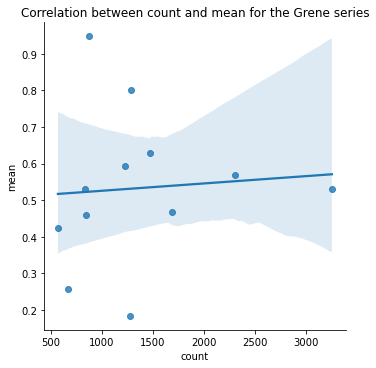

In [306]:
sns.lmplot(x='count', y='mean', data=d_Genre).set(title="Correlation between count and mean for the Grene series")

This shows that game sales have a very weak positive correlation with the total number of games in the market for the genre.

#### 2-4-4-6. This step draws a scatter plot based on the "Genre" and "'Global_Sales" series in the primary dataset

<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

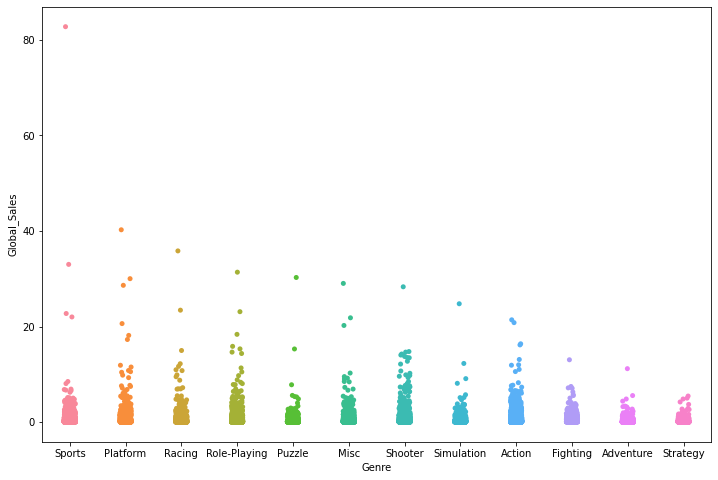

In [307]:
plt.figure(figsize=(12,8))
sns.stripplot(x=df['Genre'],y=df['Global_Sales'],data=df,jitter=True)

That is shown most genre of game has the chance to succeed, which means having some games with good sales of those genres.

### 2-4-5. Analysis of the "Publisher" series

#### 2-4-5-1. This step uses a bar chart to more visually show the publisher of the game and the number of games owned by that publisher

<AxesSubplot:xlabel='count', ylabel='Publisher'>

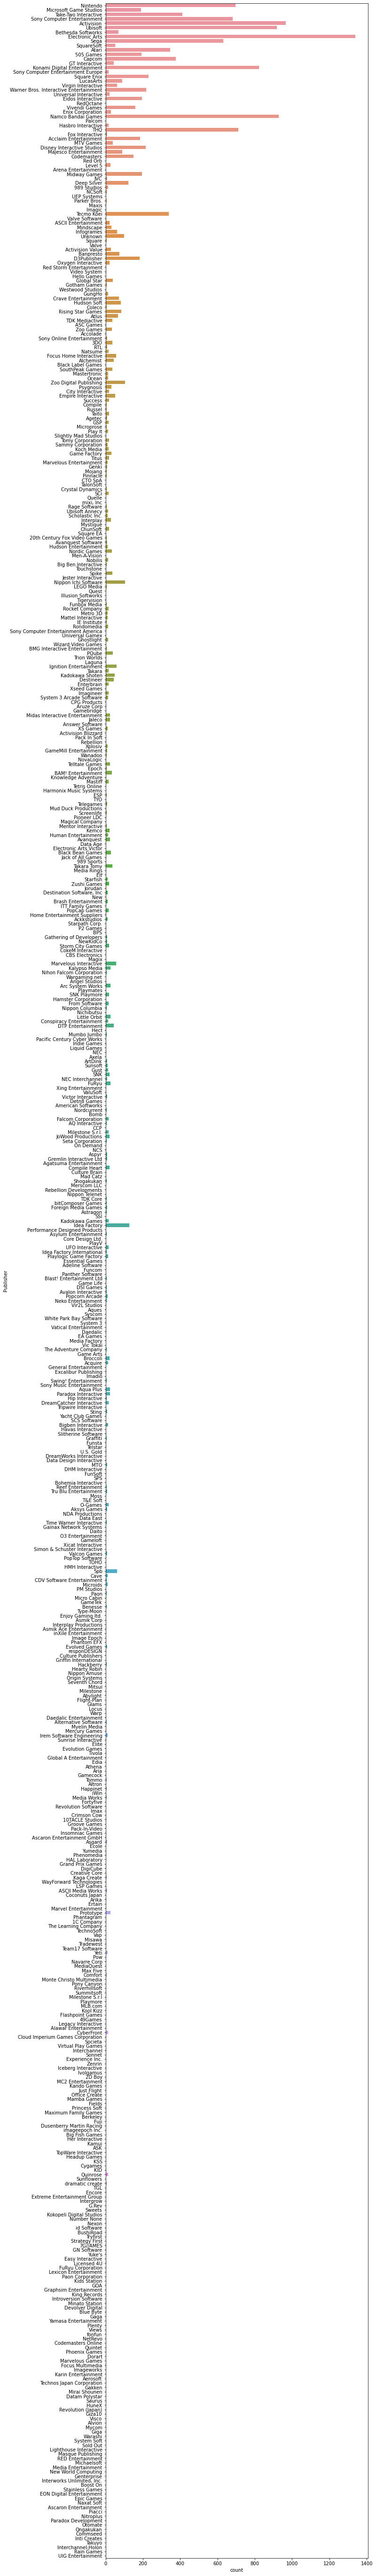

In [308]:
plt.figure(figsize=(10,100))
sns.countplot(y='Publisher',data=df)

#### 2-4-5-2. This step is used to obtain a description of the data for analysis

In [309]:
grouped_Publisher=df["Global_Sales"].groupby(df["Publisher"])
d_Publisher=grouped_Publisher.describe()
d_Publisher

,count,mean,std,min,25%,50%,75%,max
Publisher,,,,,,,,
10TACLE Studios,3.0,0.036667,0.020817,0.02,0.0250,0.030,0.0450,0.06
1C Company,3.0,0.033333,0.020817,0.01,0.0250,0.040,0.0450,0.05
20th Century Fox Video Games,5.0,0.388000,0.231019,0.22,0.2500,0.340,0.3400,0.79
2D Boy,1.0,0.040000,NaN,0.04,0.0400,0.040,0.0400,0.04
3DO,36.0,0.281111,0.272636,0.01,0.0950,0.170,0.3750,1.28
...,...,...,...,...,...,...,...,...
id Software,1.0,0.030000,NaN,0.03,0.0300,0.030,0.0300,0.03
imageepoch Inc.,2.0,0.020000,0.014142,0.01,0.0150,0.020,0.0250,0.03
inXile Entertainment,1.0,0.100000,NaN,0.10,0.1000,0.100,0.1000,0.10


#### 2-4-5-3. This step sorts the table obtained in the previous step in descending order of mean value

In [310]:
d_Publisher.sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
Publisher,,,,,,,,
Palcom,1.0,4.170000,NaN,4.17,4.170,4.17,4.1700,4.17
Red Orb,2.0,2.620000,0.268701,2.43,2.525,2.62,2.7150,2.81
Nintendo,696.0,2.563836,5.676925,0.01,0.300,0.92,2.2625,82.74
Arena Entertainment,2.0,2.360000,0.438406,2.05,2.205,2.36,2.5150,2.67
UEP Systems,1.0,2.250000,NaN,2.25,2.250,2.25,2.2500,2.25
...,...,...,...,...,...,...,...,...
Ascaron Entertainment,1.0,0.010000,NaN,0.01,0.010,0.01,0.0100,0.01
Otomate,1.0,0.010000,NaN,0.01,0.010,0.01,0.0100,0.01
Ongakukan,1.0,0.010000,NaN,0.01,0.010,0.01,0.0100,0.01


#### 2-4-5-4. This step does the necessary cleaning for data containing NaN

In [311]:
d_Publisher=d_Publisher.dropna(axis=0)
d_Publisher.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 10TACLE Studios to responDESIGN
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   384 non-null    float64
 1   mean    384 non-null    float64
 2   std     384 non-null    float64
 3   min     384 non-null    float64
 4   25%     384 non-null    float64
 5   50%     384 non-null    float64
 6   75%     384 non-null    float64
 7   max     384 non-null    float64
dtypes: float64(8)
memory usage: 27.0+ KB


#### 2-4-5-5. This step is used to get the correlation of "count" with other items of data

In [312]:
corr_matrix_Publisher = d_Publisher.corr()
corr_matrix_Publisher['count']

count    1.000000
mean     0.300670
std      0.483224
min     -0.058247
25%      0.019997
50%      0.115092
75%      0.246452
max      0.516367
Name: count, dtype: float64

#### 2-4-5-6. This step shows the correlation between "count" and "mean" graphically

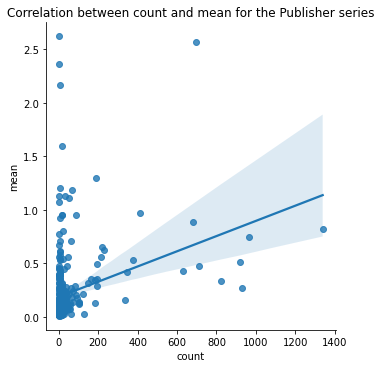

In [313]:
sns.lmplot(x='count', y='mean', data=d_Publisher).set(title="Correlation between count and mean for the Publisher series")

This suggests that game sales have a weak positive correlation with the total number of games owned by the publisher that released the game.

### 2-4-6. Analysis of games with more than 10 million copies sold worldwide

#### 2-4-6-1. This step filters games with total sales greater than 10 million from the original dataset and outputs this data as a new dataset.

In [314]:
d1=(df.loc[df['Global_Sales']>=10])
d1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
57,58,Super Mario All-Stars,SNES,1993.0,Platform,Nintendo,5.99,2.15,2.12,0.29,10.55
58,59,Pokemon FireRed/Pokemon LeafGreen,GBA,2004.0,Role-Playing,Nintendo,4.34,2.65,3.15,0.35,10.49
59,60,Super Mario 64,DS,2004.0,Platform,Nintendo,5.08,3.11,1.25,0.98,10.42
60,61,Just Dance 3,Wii,2011.0,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.26


#### 2-4-6-2. This step checks the "Publisher" series and sorts them in reverse order based on the number of games released

In [315]:
d1['Publisher'].value_counts()

Nintendo                       37
Activision                     10
Take-Two Interactive            8
Sony Computer Entertainment     4
Microsoft Game Studios          2
Ubisoft                         1
Name: Publisher, dtype: int64

#### 2-4-6-3. This step is used to obtain a description of the data and sort it by “mean” for analysis

In [316]:
grouped_Publisher_1=d1["Global_Sales"].groupby(d1["Publisher"])
d_Publisher_1=grouped_Publisher_1.describe()
d_Publisher_1.sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
Publisher,,,,,,,,
Nintendo,37.0,21.433784,13.251115,10.42,12.2100,18.140,28.3100,82.74
Microsoft Game Studios,2.0,16.980000,6.844794,12.14,14.5600,16.980,19.4000,21.82
Take-Two Interactive,8.0,15.176250,4.240791,10.57,11.7400,14.625,17.4875,21.40
Activision,10.0,13.200000,1.569975,10.21,12.9125,13.620,14.1875,14.76
Sony Computer Entertainment,4.0,12.090000,1.964603,10.77,10.9050,11.305,12.4900,14.98
Ubisoft,1.0,10.260000,NaN,10.26,10.2600,10.260,10.2600,10.26


#### 2-4-6-4. This step draws a scatter plot based on the "Publisher" and "'Global_Sales" series in the new dataset

<AxesSubplot:xlabel='Publisher', ylabel='Global_Sales'>

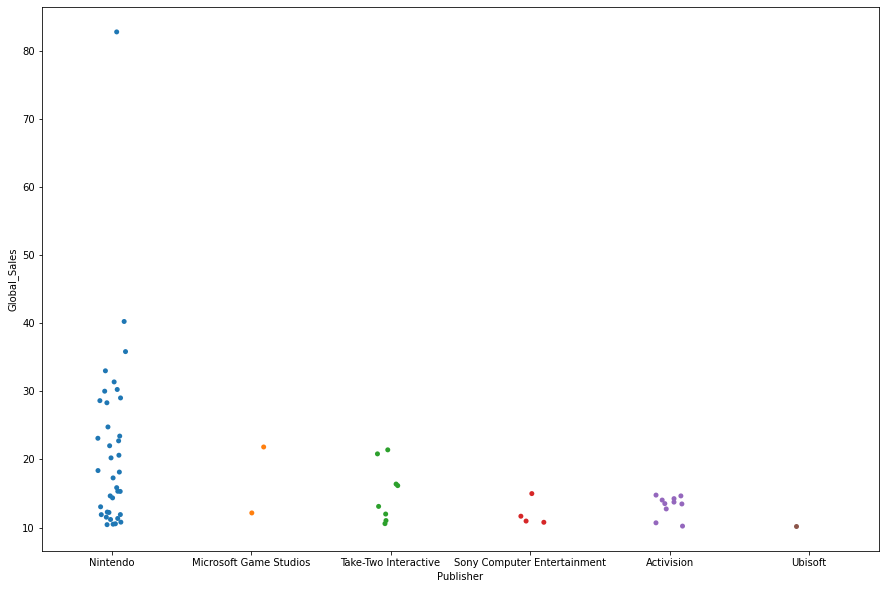

In [317]:
plt.figure(figsize=(15,10))
sns.stripplot(x=d1['Publisher'],y=d1['Global_Sales'],data=d1,jitter=True)

The above two steps show not only that Nintendo has the largest number of games that have sold more than 10 million copies but also has the highest average sales for these games. It also meant that Nintendo was the most popular game publisher then.

#### 2-4-6-5. This step checks the "Genre" series and sorts them in reverse order based on the number of games released.

In [318]:
d1['Genre'].value_counts()

Shooter         12
Platform        11
Role-Playing     9
Action           9
Racing           7
Sports           4
Misc             4
Puzzle           2
Simulation       2
Fighting         1
Adventure        1
Name: Genre, dtype: int64

#### 2-4-6-6. This step is used to obtain a description of the data and sort it by “count” for analysis

In [319]:
grouped_Genre_1=d1["Global_Sales"].groupby(d1["Genre"])
d_Genre_1=grouped_Genre_1.describe()
d_Genre_1.sort_values('count',ascending=False)

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Shooter,12.0,14.370833,4.623742,10.21,12.5825,13.620,14.3400,28.31
Platform,11.0,19.097273,9.949943,10.42,11.1550,17.280,24.6150,40.24
Action,9.0,14.812222,4.114477,10.57,11.9000,13.100,16.3800,21.40
Role-Playing,9.0,17.201111,6.485161,10.49,14.3500,15.320,18.3600,31.37
Racing,7.0,17.115714,9.365456,10.77,11.3050,12.210,19.2000,35.82
Misc,4.0,20.330000,7.727725,10.26,17.7300,21.020,23.6200,29.02
Sports,4.0,40.115000,28.857426,22.00,22.5400,27.860,45.4350,82.74
Puzzle,2.0,22.780000,10.578317,15.30,19.0400,22.780,26.5200,30.26
Simulation,2.0,18.515000,8.831764,12.27,15.3925,18.515,21.6375,24.76


#### 2-4-6-7. This step draws a scatter plot based on the "Genre" and "'Global_Sales" series in the new dataset

<AxesSubplot:xlabel='count', ylabel='Genre'>

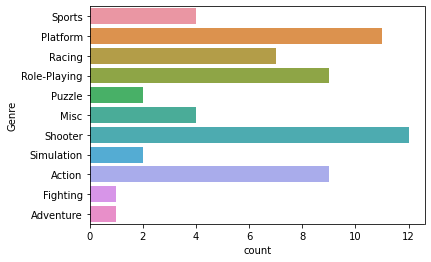

In [320]:
sns.countplot(y='Genre',data=d1)

#### *Graph we show in 2-4-4-1

<AxesSubplot:xlabel='count', ylabel='Genre'>

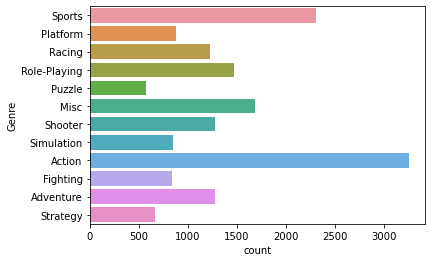

In [321]:
sns.countplot(y='Genre',data=df)

The above two steps show that in the new dataset (d1), genres like shooter, platform, role-playing, and action have many games. According to the images obtained in 2-4-4-1, except for action, in the original data set (df), the number of the other three genre games is relatively few.

# 3. Discussion

In this assignment, I explored the sales of more than 16,500 video games released between 1980 and 2016, focusing on the relationship between game platform, release year, genre, and publisher with sales. The exploratory analysis supports the hypothesis that all four variables mentioned above are related to sales. I found a moderate negative correlation between the total number of games in a game release year and the average sales of games released in that year. In addition, the number of games owned by a game's publisher has a weak positive correlation with the sales of games released by that publisher. The type of game and the total number of games on the game distribution platform do not seem to affect the game's sales. We also concluded that only a small number of games are successful (have excellent deals), which explains why the total number of games in a game release year is negatively correlated with the average number of games released in that year.

In addition, we performed a cursory exploration of games with sales of more than 10 million copies in the dataset. The results showed that Nintendo was the game publisher's favourite game publisher at the time. Also, role-playing, platform, and shooter games have relatively few numbers in the total dataset, but many in the set of the game's sales that has more than 10 million copies.

Based on these, we conclude that publishers are one of the critical factors affecting game sales. According to experience, it may be because publishers who release a large number of games usually release games with better quality and will cooperate with game producers with a better reputation.

In conclusion, the current game producers should focus on the quality of the game, just like Nintendo, which is an essential factor for players to pay for the game. In addition, if the game creator plans to make a game that sells well, they can prioritize thinking about platform, role-playing or shooter genre video games.

# 4. References

1. Source data - https://www.kaggle.com/datasets/gregorut/videogamesales?select=vgsales.csv
2. Pandas for data manipulation
3. Seaborn for data viz
4. Matplotlib for data viz